# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [150]:
import numpy as np

def integer_spiral_numpy(n):
    A = np.zeros((n+2, n+2), dtype=int)  
    start = n // 2 + 1  
    A[start, start] = 1 
    numbers = 2  
    radius = 1  
    while radius <= n // 2 + 1:
        # right
        A[start - radius  : start + radius, start + radius][::-1] = np.arange(numbers, numbers + 2 * radius)
        numbers += 2*radius
        
        # top
        A[start-radius, start-radius:start+radius][::-1] = np.arange(numbers, numbers + 2*radius)
        numbers += 2*radius
        
        # left
        A[start-radius+1:start+radius+1, start-radius] = np.arange(numbers, numbers + 2*radius)
        numbers += 2*radius
        
        # bottom
        A[start+radius, start-radius+1:start+radius+1] = np.arange(numbers, numbers + 2*radius)
        numbers += 2*radius
        
        radius += 1
    
    
    
    return A[1:-1, 1:-1]  

print(integer_spiral_numpy(7))

[[37 36 35 34 33 32 31]
 [38 17 16 15 14 13 30]
 [39 18  5  4  3 12 29]
 [40 19  6  1  2 11 28]
 [41 20  7  8  9 10 27]
 [42 21 22 23 24 25 26]
 [43 44 45 46 47 48 49]]


In [148]:
%%timeit
# TODO otestujte rychlost obou implementací
integer_spiral_numpy(101)

389 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [149]:
%%timeit
integer_spiral(101)

7.96 ms ± 302 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
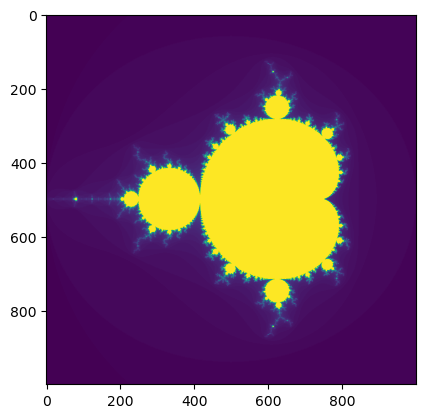

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [175]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
      A = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
      C = A[0] + 1j*A[1]
      Z = np.zeros_like(C)
      divergence_matrix = np.zeros_like(C, dtype=bool)
      for j in range(k):
            Z = Z**2 + C
            divergence_matrix = np.abs(Z) < 2
      return divergence_matrix

/tmp/ipykernel_10247/1506247995.py:7: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
/tmp/ipykernel_10247/1506247995.py:7: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C


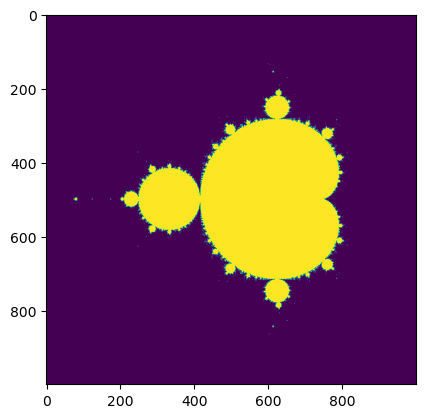

In [176]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [241]:
def julia_set(c, x_min = -2, x_max = 2, y_min = -2, y_max = 2, n = 1000, k = 100):
    A = np.meshgrid(np.linspace(x_min, x_max, n), np.linspace(y_min, y_max, n))
    Z = A[0] + 1j*A[1]
    C = np.full_like(Z, c)
    divergence_matrix = np.zeros_like(Z, dtype=bool)
    for j in range(k):
        Z = Z**2 + C
        divergence_matrix = np.abs(Z) < 2
    return divergence_matrix

/tmp/ipykernel_10247/4001588136.py:7: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
/tmp/ipykernel_10247/4001588136.py:7: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C


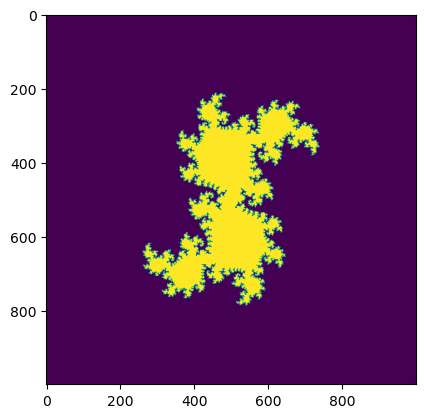

In [242]:
n = 1000
k = 100

divergence_matrix = julia_set( 0.35 + 0.35j, n=n, k=k)
plt.imshow(divergence_matrix)

In [256]:
import numpy as np

def is_notprime(num):
    if num < 2:
        return True
    for i in range(2, int(np.sqrt(num)) + 1):
        if num % i == 0:
            return True
    return False

def integer_spiral_numpy(n):
    A = np.zeros((n+2, n+2), dtype=int)  
    start = n // 2 + 1  
    A[start, start] = 1 
    numbers = 2  
    radius = 1  
    
    while radius <= n // 2 + 1:
        # right
        A[start - radius  : start + radius, start + radius][::-1] = np.arange(numbers, numbers + 2 * radius)
        numbers += 2*radius
        
        # top
        A[start-radius, start-radius:start+radius][::-1] = np.arange(numbers, numbers + 2*radius)
        numbers += 2*radius
        
        # left
        A[start-radius+1:start+radius+1, start-radius] = np.arange(numbers, numbers + 2*radius)
        numbers += 2*radius
        
        # bottom
        A[start+radius, start-radius+1:start+radius+1] = np.arange(numbers, numbers + 2*radius)
        numbers += 2*radius
        
        radius += 1
    
    A = A[1:-1, 1:-1]  
    mask = np.vectorize(is_notprime)(A)
    A[mask] = 0
    
    return A

print(integer_spiral_numpy(7))


[[37  0  0  0  0  0 31]
 [ 0 17  0  0  0 13  0]
 [ 0  0  5  0  3  0 29]
 [ 0 19  0  0  2 11  0]
 [41  0  7  0  0  0  0]
 [ 0  0  0 23  0  0  0]
 [43  0  0  0 47  0  0]]
